In [1]:
%pip install librosa soundfile tensorflow scikit-learn numpy matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import librosa
import soundfile as sf
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/

In [4]:
# 2. TẢI MÔ HÌNH VÀ TIỀN XỬ LÝ
model = tf.keras.models.load_model("ser_mlp_model.h5")
print("✅ Đã tải mô hình SER huấn luyện thành công.")

emotions = ['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
encoder = LabelEncoder()
encoder.fit(emotions)

✅ Đã tải mô hình SER huấn luyện thành công.


LabelEncoder()

In [6]:
# 3. HÀM TRÍCH XUẤT ĐẶC TRƯNG TỪ FILE ÂM THANH MỚI
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    stft = np.abs(librosa.stft(y))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
    features = np.hstack([mfccs, chroma, contrast])
    return features.reshape(1, -1)

In [ ]:
# 4. HÀM DỰ ĐOÁN CẢM XÚC

def predict_emotion(file_path):
    features = extract_features(file_path)
    scaler = StandardScaler()
    features = scaler.fit_transform(features)  # chuẩn hóa cùng dạng huấn luyện
    
    preds = model.predict(features)
    pred_class = np.argmax(preds, axis=1)
    predicted_emotion = encoder.inverse_transform(pred_class)[0]
    
    print(f" File: {os.path.basename(file_path)}")
    print(f" Cảm xúc dự đoán: {predicted_emotion.upper()}")
    return predicted_emotion


In [9]:
# 5. DEMO DỰ ĐOÁN TRÊN FILE ÂM THANH THỰC TẾ
test_file = r"D:\DEEPFAKE_PROJECT\SER_Project\data\Actor_01\03-01-01-01-02-01-01.wav"  # thay bằng đường dẫn thật

if os.path.exists(test_file):
    emotion = predict_emotion(test_file)
else:
    print("⚠️ Vui lòng thêm 1 file .wav mẫu vào thư mục test_audio để demo.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
🎙️ File: 03-01-01-01-02-01-01.wav
👉 Cảm xúc dự đoán: SURPRISED


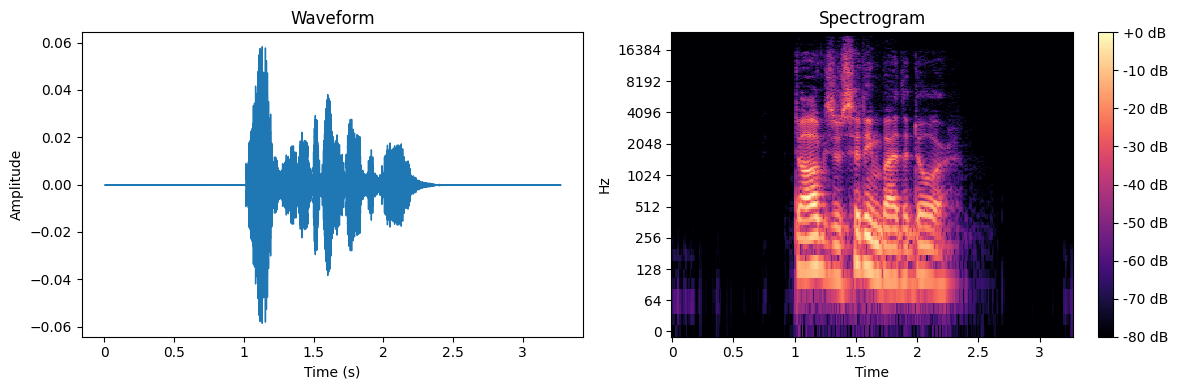

In [10]:
# 6. TRỰC QUAN HÓA DẠNG SÓNG ÂM VÀ PHỔ  
if os.path.exists(test_file):
    y, sr = librosa.load(test_file, sr=None)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(1,2,2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrogram")
    plt.colorbar(format="%+2.0f dB")
    plt.tight_layout()
    plt.show()